In [ ]:
#take in text file input, each line the best player of a generation
# [generation#][complexity bound]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
GENERATIONS = 100
NUM_TURNS = 30
POP_SIZE = 100

Complexity of multiple runs

FileNotFoundError: ignored

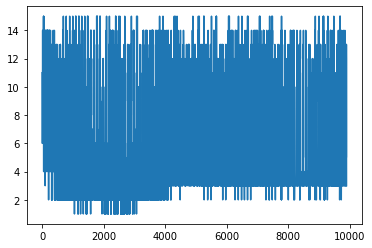

In [ ]:
#@title
for i in range(1,6): #non-inclusive

  filename = "outGen" + str(i) + ".txt"
  with open(filename) as f:
      lines = f.readlines()
      #print(lines)

  pComplexity = [];
  for line in lines:
    parse = int(line.strip().split(" ")[-1]) #gets rid of new line, splits on space, and takes second element (complexity)
    pComplexity.append(parse)

  pComplexity = np.array(pComplexity)
  plt.plot(pComplexity)
  #https://stackoverflow.com/questions/10121926/initialise-numpy-array-of-unknown-length
  # pComplexity = np.array([line for line in lines])


Complexity of just one run

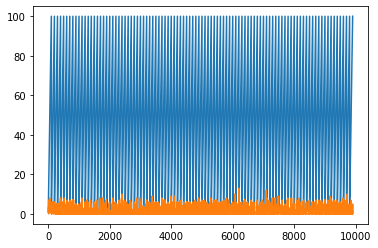

In [ ]:
#@title
filename = "outGen" + "1" + ".txt"
with open(filename) as f:
    lines = f.readlines()
    #print(lines)

pComplexity = [];
pStateTotal = [];
for line in lines:
  parse = line.strip().split(" ")
  # print(parse)
  complexity = int(parse[1]) #gets rid of new line, splits on space, and takes second element (complexity)
  stateTotal = int(parse[2])
  pComplexity.append(complexity)
  pStateTotal.append(stateTotal)

pComplexity = np.array(pComplexity)
pStateTotal = np.array(pStateTotal)
# print(pComplexity)
plt.plot(pComplexity)
plt.plot(pStateTotal)

Avg Complexity of Players over all Generations

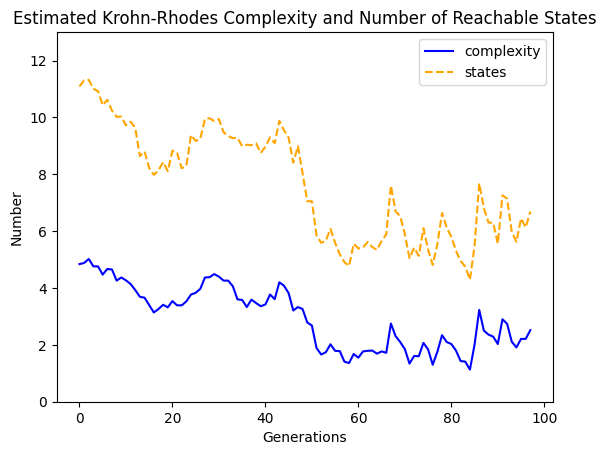

98
4.678673469387753


In [ ]:
filename = "state_complex_" + "noPen10" + ".txt"
with open(filename) as f:
    lines = f.readlines()
    #print(lines)

#file goes generation, player#, complexity, state
pAvgComplexity = []
pAvgStateTotal = []
prevGen = 1
playerCount = 0
runningComplexity = 0
runningStateTotal = 0

for line in lines:
  parse = line.strip().split(" ")
  # print(parse)
  currGen = int(parse[0])

  complexity = int(parse[2]) #gets rid of new line, splits on space, and takes third element (complexity)
  stateTotal = int(parse[3])

  # print(currGen)

  if (currGen != prevGen):
    pAvgComplexity.append(runningComplexity/playerCount)
    pAvgStateTotal.append(runningStateTotal/playerCount)

    #reset the count
    playerCount = 0
    prevGen = currGen
    runningComplexity = 0
    runningStateTotal = 0

  playerCount += 1
  runningComplexity += complexity
  runningStateTotal += stateTotal

pAvgComplexity = np.array(pAvgComplexity)
pAvgStateTotal = np.array(pAvgStateTotal)
# print(pComplexity)

x = np.arange(0, len(pAvgComplexity))
fig, ax = plt.subplots()
ax.set_xlabel("Generations")
ax.set_ylabel("Number")
ax.plot(x, pAvgComplexity, color ="blue", label="complexity")
ax.plot(x, pAvgStateTotal, color ="orange", linestyle='--', label="states")
ax.set_ylim(ymin=0,ymax=13)
ax.legend()
ax.set_title('Estimated Krohn-Rhodes Complexity and Number of Reachable States')
plt.show()

# plt.plot(pAvgComplexity)
# plt.plot(pAvgStateTotal)

#this is for getting the total mean difference, for excel
totalMeanDiff = 0
totalGen = len(pAvgComplexity)
for i in range(totalGen):
  totalMeanDiff += pAvgStateTotal[i] - pAvgComplexity[i]

print(totalGen)
totalMeanDiff = totalMeanDiff/totalGen
print(totalMeanDiff)

In [ ]:
print(len(pAvgComplexity))
print(pAvgStateTotal)

98
[15.33009709 14.36       13.61       12.45        9.33        6.15
  3.42        3.33        2.72        2.8         3.22        2.02
  2.43        2.67        1.54        2.83        2.83        3.92
  5.84        6.6         8.27       12.37       11.41       12.94
 12.64       13.42       12.64       13.49       13.32       12.07
 11.65       12.64       13.1        13.97       14.08       13.38
 14.08       12.07       12.61       12.29       12.39       13.11
 13.61       13.9        14.12       13.17       13.77       14.36
 13.73       13.81       12.4        12.35       11.25       12.85
 10.73        9.74        8.84        7.44       10.39        9.54
  8.01        8.96        7.25        8.72        8.14        7.52
  7.48        5.99        8.57       10.03       11.39       12.38
 11.85       12.34       10.61       12.79       12.46       12.44
 11.3        11.84       12.82       12.27       10.52        9.51
 10.77        7.93        9.33        7.45        9.4      

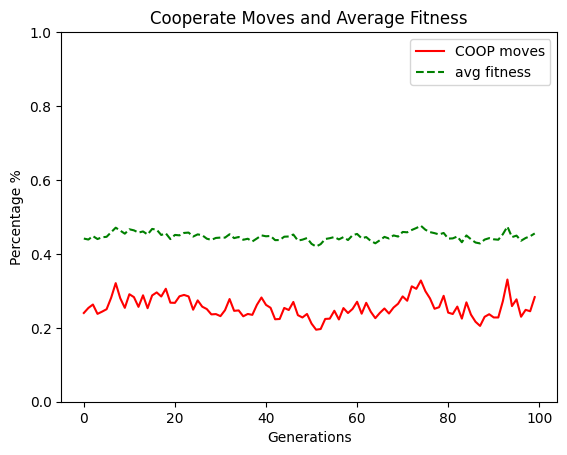

In [ ]:
#plot recorded fitness and coopPercent
turnEachPlayerGets = POP_SIZE*NUM_TURNS

recordFitness = []
recordCoop = []
color = ["#000088", "#00aaff", "#008888", "#88ff00", "#ffdd22", "#ff8800", "#ff0000", "#8822ff"]

filename = "fitness_coop_" + "noEvo1" + ".txt"
# filename = "fitness_coop_noEvo" + "1" + ".txt"
with open(filename) as f:
    lines = f.readlines()
    #print(lines)

#works for both just one recorded session and several
fitness = [];
coopPercent = [];
# for i in range(0, len(lines), 2):
  # fitness = lines[i].strip().split(" ")
  # coopPercent = lines[i+1].strip().split(" ")

fitness = [float(n) for n in lines[0].strip().split(" ")]
coopPercent = [float(n) for n in lines[1].strip().split(" ")]
fitness = np.divide(np.array(fitness),(5*turnEachPlayerGets))
coopPercent = np.array(coopPercent)

x = np.arange(0, GENERATIONS)
fig, ax = plt.subplots()
ax.set_xlabel("Generations")
ax.set_ylabel("Percentage %")
ax.plot(x, coopPercent, color ="red", label="COOP moves")
ax.plot(x, fitness, color ="green", linestyle='--', label="avg fitness")
ax.set_ylim(ymin=0, ymax=1.0)
ax.legend()
ax.set_title('Cooperate Moves and Average Fitness')
plt.show()

# plt.plot(fitness)
# plt.plot(coopPercent)

Plots 10 fitness coop (make sure to upload them all). the color doesn't really do anything

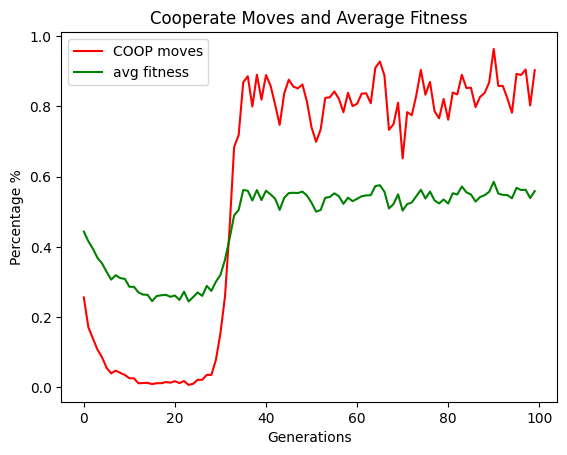

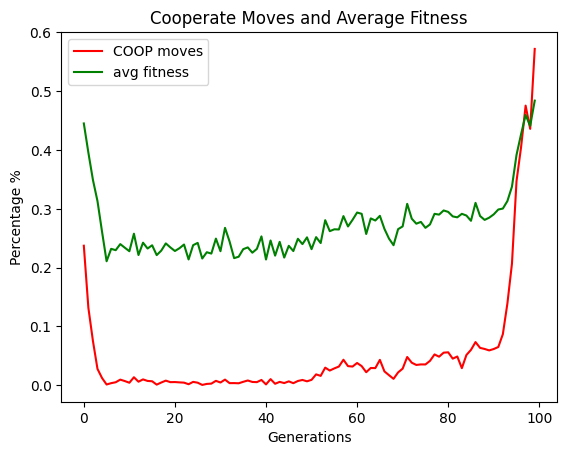

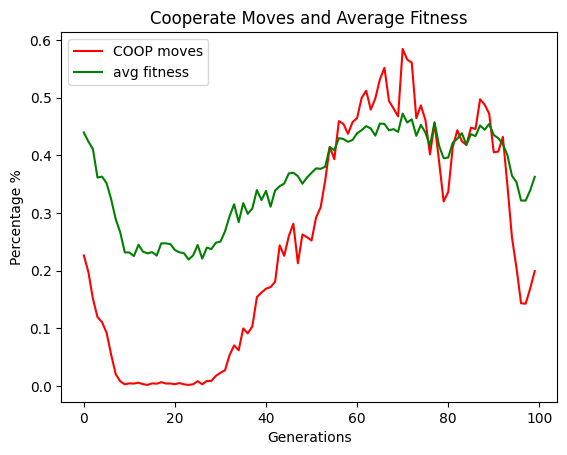

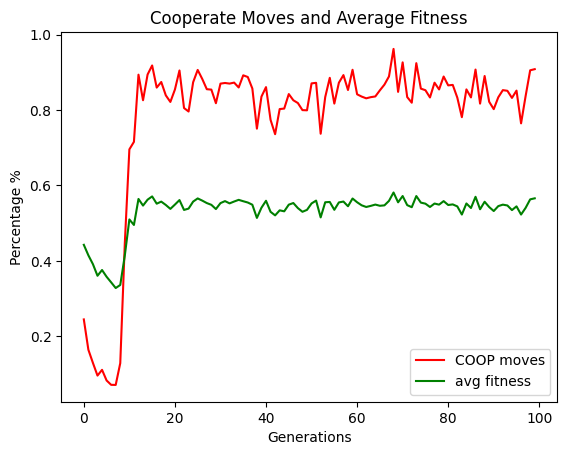

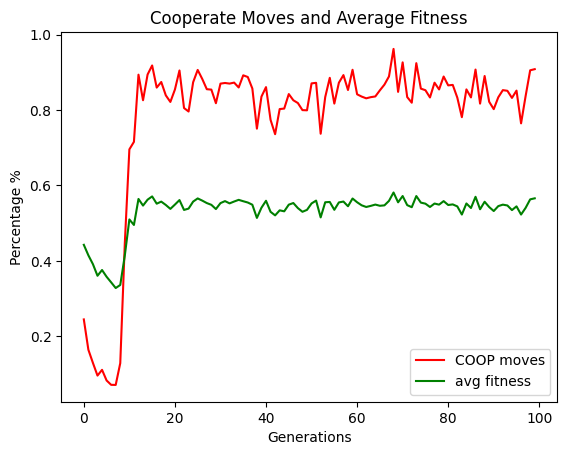

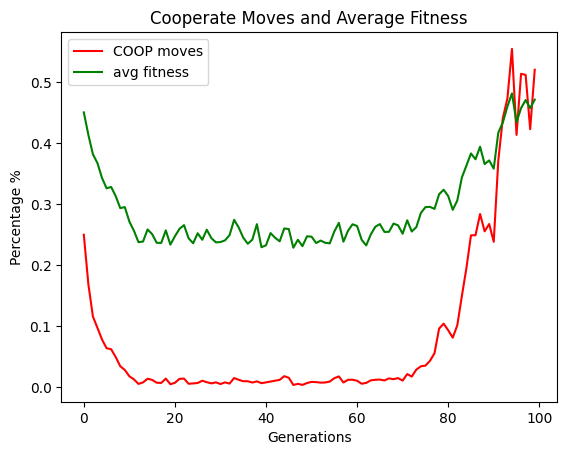

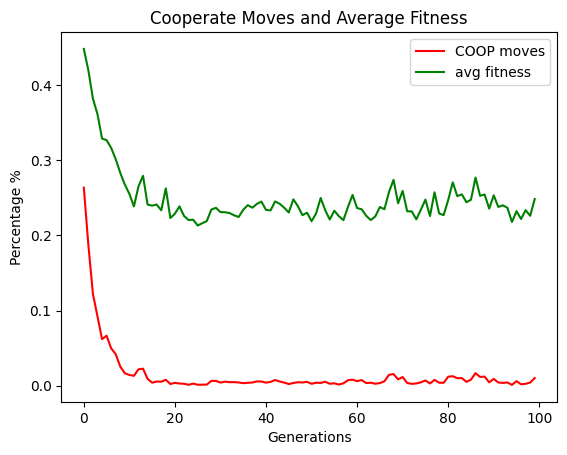

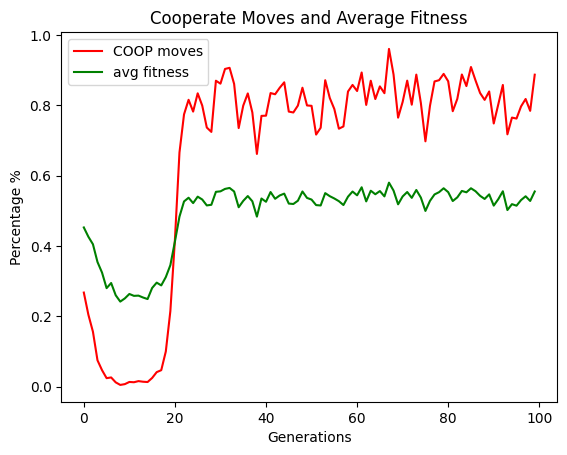

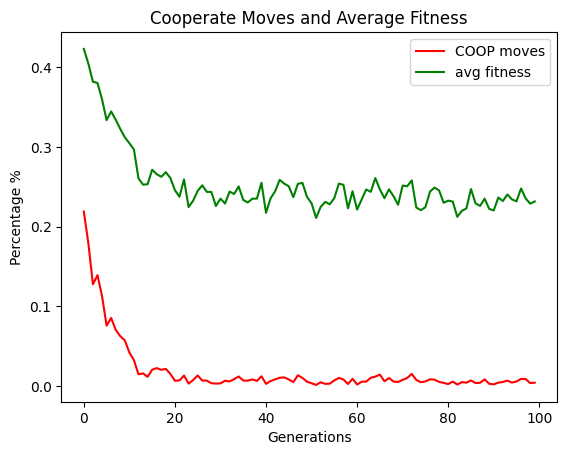

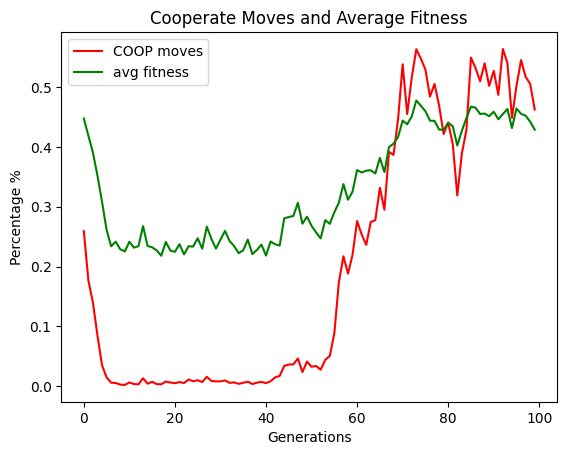

In [ ]:
# @title
#plot recorded fitness and coopPercent
turnEachPlayerGets = POP_SIZE*NUM_TURNS

recordFitness = []
recordCoop = []
color = ["#000088", "#00aaff", "#008888", "#88ff00", "#ffdd22", "#ff8800", "#ff0000", "#8822ff", "#ff0000", "#8822ff"]

for idx, c in enumerate(color):
  filename = "fitness_coop_divadd" + str(idx+1) + ".txt"
  # filename = "fitness_coop_noEvo" + "1" + ".txt"
  with open(filename) as f:
      lines = f.readlines()
      #print(lines)

  #works for both just one recorded session and several
  fitness = [];
  coopPercent = [];
  # for i in range(0, len(lines), 2):
    # fitness = lines[i].strip().split(" ")
    # coopPercent = lines[i+1].strip().split(" ")

  fitness = [float(n) for n in lines[0].strip().split(" ")]
  coopPercent = [float(n) for n in lines[1].strip().split(" ")]
  fitness = np.divide(np.array(fitness),(5*turnEachPlayerGets))
  coopPercent = np.array(coopPercent)

  x = np.arange(0, GENERATIONS)
  fig, ax = plt.subplots()
  ax.set_xlabel("Generations")
  ax.set_ylabel("Percentage %")
  ax.plot(x, coopPercent, color ="red", label="COOP moves")
  ax.plot(x, fitness, color ="green", label="avg fitness")
  ax.legend()
  ax.set_title('Cooperate Moves and Average Fitness')
  plt.show()

  # plt.plot(fitness)
  # plt.plot(coopPercent)

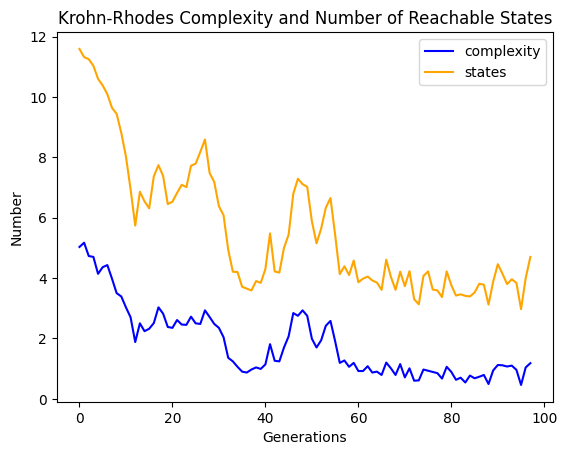

98
3.7544897959183667


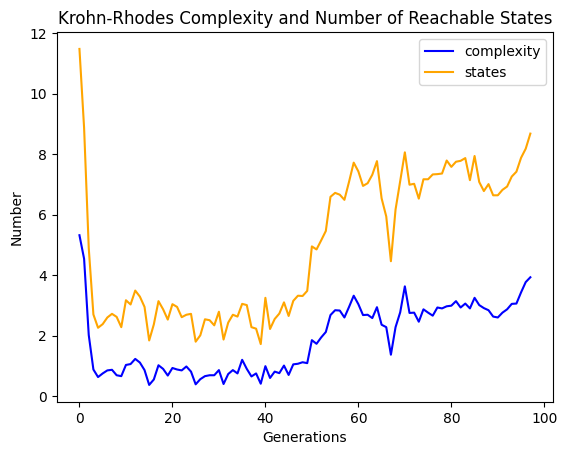

98
3.0803061224489796


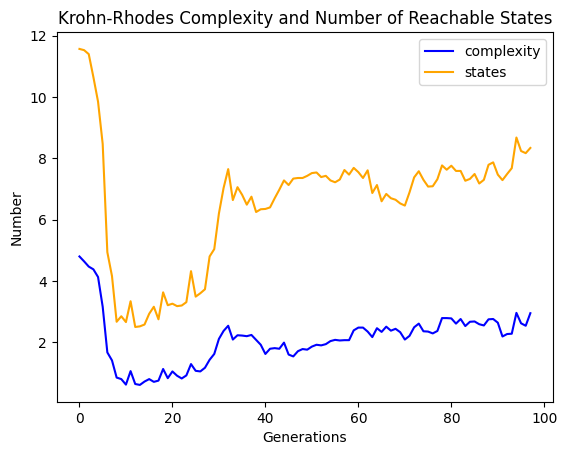

98
4.423877551020409


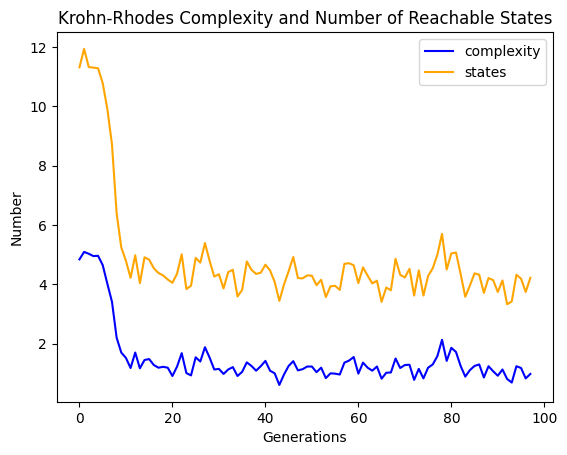

98
3.3553061224489813


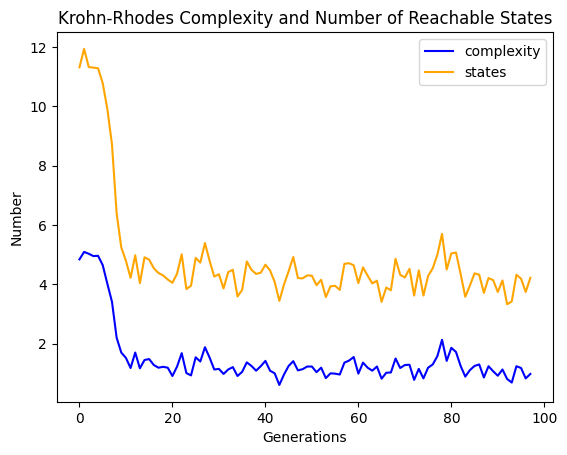

98
3.3553061224489813


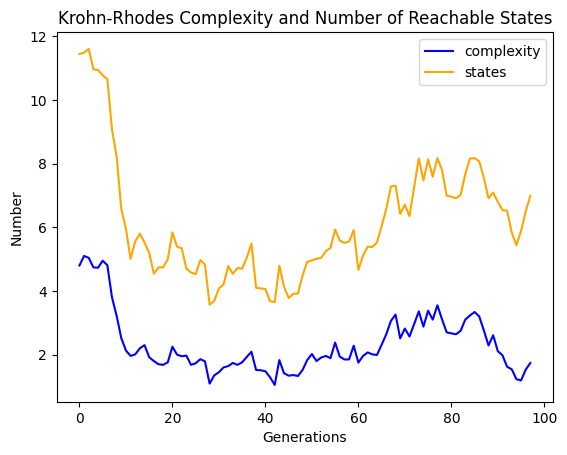

98
3.8170408163265312


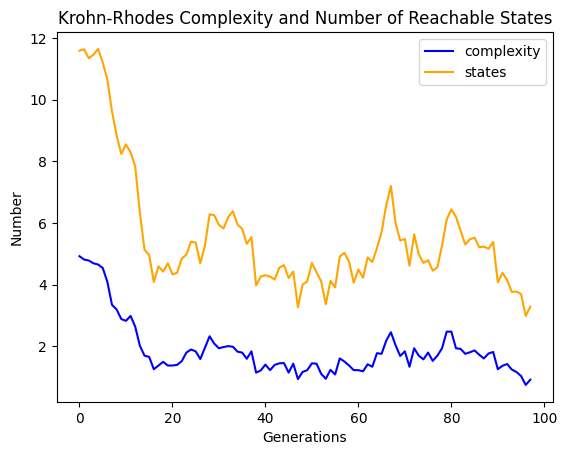

98
3.711530612244898


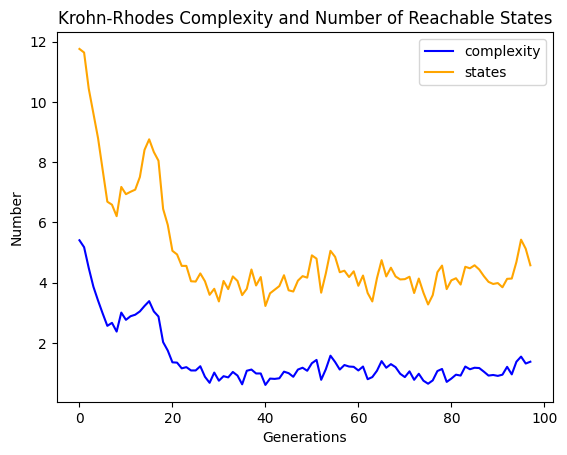

98
3.4699999999999984


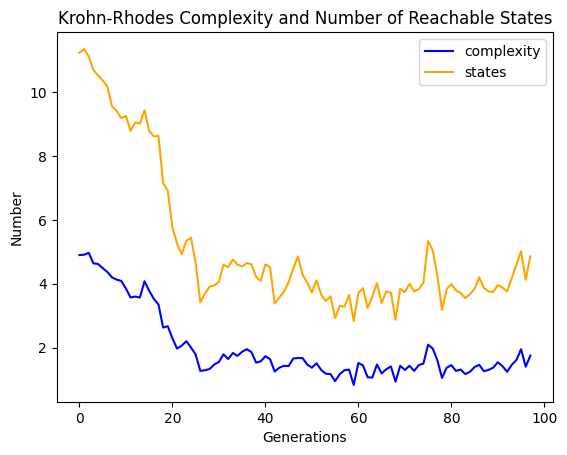

98
3.1657142857142846


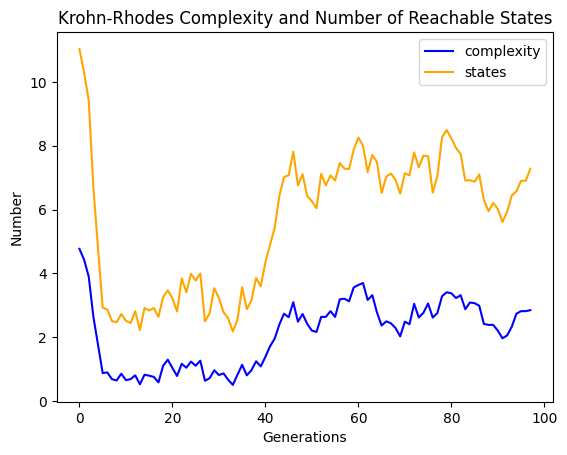

98
3.519795918367347


In [ ]:
for i in range(1,11):
  filename = "outGen" + str(i) + ".txt"
  with open(filename) as f:
      lines = f.readlines()
      #print(lines)

  #file goes generation, player#, complexity, state
  pAvgComplexity = []
  pAvgStateTotal = []
  prevGen = 1
  playerCount = 0
  runningComplexity = 0
  runningStateTotal = 0

  for line in lines:
    parse = line.strip().split(" ")
    # print(parse)
    currGen = int(parse[0])

    complexity = int(parse[2]) #gets rid of new line, splits on space, and takes third element (complexity)
    stateTotal = int(parse[3])

    # print(currGen)

    if (currGen != prevGen):
      pAvgComplexity.append(runningComplexity/playerCount)
      pAvgStateTotal.append(runningStateTotal/playerCount)

      #reset the count
      playerCount = 0
      prevGen = currGen
      runningComplexity = 0
      runningStateTotal = 0

    playerCount += 1
    runningComplexity += complexity
    runningStateTotal += stateTotal

  pAvgComplexity = np.array(pAvgComplexity)
  pAvgStateTotal = np.array(pAvgStateTotal)
  # print(pComplexity)

  x = np.arange(0, len(pAvgComplexity))
  fig, ax = plt.subplots()
  ax.set_xlabel("Generations")
  ax.set_ylabel("Number")
  ax.plot(x, pAvgComplexity, color ="blue", label="complexity")
  ax.plot(x, pAvgStateTotal, color ="orange", label="states")
  ax.legend()
  ax.set_title('Krohn-Rhodes Complexity and Number of Reachable States')
  plt.show()

  # plt.plot(pAvgComplexity)
  # plt.plot(pAvgStateTotal)

  #this is for getting the total mean difference, for excel
  totalMeanDiff = 0
  totalGen = len(pAvgComplexity)
  for i in range(totalGen):
    totalMeanDiff += pAvgStateTotal[i] - pAvgComplexity[i]

  print(totalGen)
  totalMeanDiff = totalMeanDiff/totalGen
  print(totalMeanDiff)